In [79]:
# AJUSTAR LA DATA PARA QUE DE RESULTADOS!!!!

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [110]:
# Multiple linear Regression

In [111]:
from sklearn.datasets import make_regression

In [112]:
df = pd.read_csv('jailbook_cleaned.csv')

In [113]:
df.head()

,Unnamed: 0,Defendant,Address,Zip,City,State,Crime_Family,Crime_Family1,Crime_Family2,Booking_year,...,Booking_day,Booking_Date,DOB_year,DOB_month,DOB_day,Date_of_birth,Age,day_of_week,Age_Crime,CityRN
0,1,"DITAS, MICHAEL",7484 NW 169 TERR,NaN,MIAMI,FL,"THEFT, ROBBERY, AND RELATED CRIMES",ASSAULT & BATTERY,PERSONAL CRIME,2015,...,5,6/5/2015,1982,2,17,2/17/1982,37,Friday,33,MIAMI
1,4,"DORSEY, JOHN",651 NW 177TH STREET 101,NaN,MIAMI GARDENS,FL,ALCOHOL PROHIBITION,DRUGS & ALCOHOL,STATUTORY CRIME,2015,...,5,6/5/2015,1985,4,11,4/11/1985,34,Friday,30,MIAMI
2,16,"GAITOR, RASHAD ZAROSHUA",UNKNOWN,NaN,MIAMI,FL,WARRANT,MISCELLANEOUS CRIMES,OTHER,2015,...,5,6/5/2015,1991,8,19,8/19/1991,27,Friday,23,MIAMI
3,24,"WILLIAMS, ALAN J",UNKNOWN,NaN,MIAMI,FL,ALCOHOL PROHIBITION,DRUGS & ALCOHOL,STATUTORY CRIME,2015,...,3,6/3/2015,1964,4,28,4/28/1964,55,Wednesday,51,MIAMI
4,29,"WYNTER, KALONJI ABAYOMI",HOMELESS,NaN,HOMELESS,FL,WARRANT,MISCELLANEOUS CRIMES,OTHER,2015,...,3,6/3/2015,1977,5,19,5/19/1977,42,Wednesday,38,HOMELESS


In [114]:
# Drop columns that will be not used 
df.drop(['Defendant', 'Unnamed: 0', 'Address', 'Zip', 'City', 'State', 'Crime_Family','Crime_Family2', 'Booking_day', 'Booking_year', 'Booking_month', 'Booking_Date', 'DOB_day', 'DOB_month','DOB_year','Date_of_birth', 'Age', 'day_of_week', 'Age_Crime'], axis=1, inplace=True)

In [115]:
df.head()

,Crime_Family1,CityRN
0,ASSAULT & BATTERY,MIAMI
1,DRUGS & ALCOHOL,MIAMI
2,MISCELLANEOUS CRIMES,MIAMI
3,DRUGS & ALCOHOL,MIAMI
4,MISCELLANEOUS CRIMES,HOMELESS


In [116]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
df = pd.get_dummies(df)
df.head()
### END SOLUTION

,Crime_Family1_ABUSE,Crime_Family1_ASSAULT & BATTERY,Crime_Family1_BURGLARY,Crime_Family1_CRIMINAL GANG,Crime_Family1_DRUGS & ALCOHOL,Crime_Family1_FIRE,Crime_Family1_GAMBLING,Crime_Family1_HOMICIDE,Crime_Family1_KIDNAPPING,Crime_Family1_MISCELLANEOUS CRIMES,Crime_Family1_PROTEST,Crime_Family1_SEXUAL MISCONDUCT,Crime_Family1_TREASON,Crime_Family1_WHITE COLLAR,CityRN_FOREIGN,CityRN_HOMELESS,CityRN_MIAMI
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [117]:
df.dtypes

Crime_Family1_ABUSE                   uint8
Crime_Family1_ASSAULT & BATTERY       uint8
Crime_Family1_BURGLARY                uint8
Crime_Family1_CRIMINAL GANG           uint8
Crime_Family1_DRUGS & ALCOHOL         uint8
Crime_Family1_FIRE                    uint8
Crime_Family1_GAMBLING                uint8
Crime_Family1_HOMICIDE                uint8
Crime_Family1_KIDNAPPING              uint8
Crime_Family1_MISCELLANEOUS CRIMES    uint8
Crime_Family1_PROTEST                 uint8
Crime_Family1_SEXUAL MISCONDUCT       uint8
Crime_Family1_TREASON                 uint8
Crime_Family1_WHITE COLLAR            uint8
CityRN_FOREIGN                        uint8
CityRN_HOMELESS                       uint8
CityRN_MIAMI                          uint8
dtype: object

In [118]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = df[[
'Crime_Family1_ABUSE',
'Crime_Family1_ASSAULT & BATTERY',
'Crime_Family1_BURGLARY',
'Crime_Family1_CRIMINAL GANG',
'Crime_Family1_DRUGS & ALCOHOL', 
'Crime_Family1_PROTEST',
'Crime_Family1_FIRE',
'Crime_Family1_GAMBLING',
'Crime_Family1_HOMICIDE',
'Crime_Family1_KIDNAPPING',
'Crime_Family1_MISCELLANEOUS CRIMES',
'Crime_Family1_SEXUAL MISCONDUCT',
'Crime_Family1_TREASON',
'Crime_Family1_WHITE COLLAR',
'CityRN_FOREIGN',
'CityRN_HOMELESS']]
y = df['CityRN_MIAMI'].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(31006, 16) (31006, 1)


In [119]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [120]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [121]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [122]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

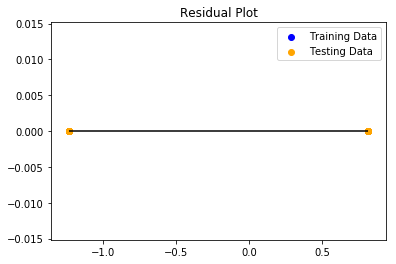

In [123]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [124]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 8.794206991126921e-29, R2: 1.0


In [125]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.00023971510171294955, R2: 0.9997606331227711


In [126]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.6032335910130173e-13, R2: 0.9999999999997402


In [127]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.00018130666196569702, R2: 0.9998189567149278
